In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [60]:
classes = {
    'Name': ['Sandal', 'Pullover', 'Bag'],
    'Index': [5, 2, 8]
}
train_filter = np.isin(train_labels, classes['Index'])
test_filter = np.isin(test_labels, classes['Index'])
x_train, y_train = train_data[train_filter], train_labels[train_filter]
x_test, y_test = test_data[test_filter], test_labels[test_filter]

y_train[y_train == 5] = 0
y_train[y_train == 2] = 1
y_train[y_train == 8] = 2
y_test[y_test == 5] = 0
y_test[y_test == 2] = 1
y_test[y_test == 8] = 2

classes['Index'] = [0, 1, 2]

In [61]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax") 
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model.fit(x_train,
                                y_train,
                                epochs=10,
                                validation_data=(x_test, y_test))

Epoch 1/10
563/563 [==============================] - 3s 3ms/step - loss: 1.0740 - accuracy: 0.4346 - val_loss: 0.9031 - val_accuracy: 0.5250
Epoch 2/10
563/563 [==============================] - 1s 3ms/step - loss: 0.7022 - accuracy: 0.6388 - val_loss: 0.5297 - val_accuracy: 0.7913
Epoch 3/10
563/563 [==============================] - 1s 3ms/step - loss: 0.3004 - accuracy: 0.9332 - val_loss: 0.2168 - val_accuracy: 0.9717
Epoch 4/10
563/563 [==============================] - 1s 3ms/step - loss: 0.1573 - accuracy: 0.9761 - val_loss: 0.1474 - val_accuracy: 0.9767
Epoch 5/10
563/563 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9808 - val_loss: 0.1204 - val_accuracy: 0.9807
Epoch 6/10
563/563 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.9834 - val_loss: 0.1193 - val_accuracy: 0.9713
Epoch 7/10
563/563 [==============================] - 2s 3ms/step - loss: 0.0781 - accuracy: 0.9844 - val_loss: 0.0953 - val_accuracy: 0.9840
Epoch 

In [66]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001*3), 
                 metrics=["accuracy"])

# Fit the model
history = model_2.fit(x_train,
                       y_train,
                       epochs=10,
                       validation_data=(x_test, y_test))

Epoch 1/10
563/563 [==============================] - 3s 3ms/step - loss: 0.8965 - accuracy: 0.6471 - val_loss: 0.5468 - val_accuracy: 0.7200
Epoch 2/10
563/563 [==============================] - 1s 2ms/step - loss: 0.3979 - accuracy: 0.8729 - val_loss: 0.2929 - val_accuracy: 0.9380
Epoch 3/10
563/563 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.9388 - val_loss: 0.2249 - val_accuracy: 0.9377
Epoch 4/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1952 - accuracy: 0.9467 - val_loss: 0.1789 - val_accuracy: 0.9513
Epoch 5/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1692 - accuracy: 0.9521 - val_loss: 0.1828 - val_accuracy: 0.9507
Epoch 6/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1541 - accuracy: 0.9547 - val_loss: 0.1611 - val_accuracy: 0.9523
Epoch 7/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1435 - accuracy: 0.9572 - val_loss: 0.1496 - val_accuracy: 0.9590
Epoch 

In [70]:
y_probs = model_2.predict(x_test) # "probs" is short for probabilities

94/94 [==============================] - 0s 2ms/step


94/94 [==============================] - 0s 2ms/step


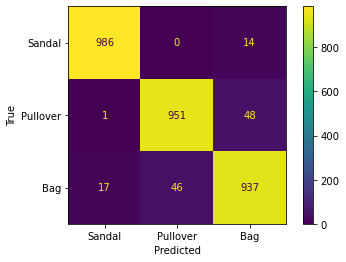

In [73]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model_2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes['Name'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
plt.show()